# Homework 1 Part 2

**Due: Monday, September 16, 11:59 PM**

This is an individual assignment.

## Description

Create or edit this Jupyter Notebook to answer the questions below. Use simulations to answer these questions. An analytical solution can be useful to check if your simulation is correct but analytical solutions alone will not be accepted as a solution to a problem.

In [3]:
import random
import numpy.random as npr
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

## Problem 7

Consider repeatedly rolling a fair 6-sided die.

1. Create a simulation to compute the probability that the top face will be 6 at least once on 3 rolls of the die?
2. Create a simulation to compute the probability that the top face will be 6 at least once on 6 rolls of the die?
3. Create a simulation to compute how many rolls of the die would you have to do to be 90% confident that you would see at least one 6?
4. Using the formula you have computed in problem 2 part 4, make a Python function that takes in the target value $p$ and outputs the required number of rolls of an integer. 
    1. Find the values for $p=0.95$ and $p=0.99$. 
    2. Use your simulation to verify that the number of rolls you specified is sufficient to achieve $p\geq 0.95$.

In [4]:
#Problem 7:
#1.
num_Sims = 100000
count = 0;
dice = npr.randint(1,7,size=(num_Sims,3))
event = np.sum(np.any(dice==6,axis=1))
print(dice)
print(event)
print('Probailty of getting a 6 at least once when rolling a dice three times:', event/num_Sims)


[[1 5 2]
 [6 1 1]
 [2 1 4]
 ...
 [3 6 1]
 [4 1 1]
 [6 2 2]]
42201
Probailty of getting a 6 at least once when rolling a dice three times: 0.42201


In [51]:
#Problem 7:
#2.
num_Sims = 10000000
count = 0;
dice = npr.randint(1,7,size=(num_Sims,6))
event = np.sum(np.any(dice==6,axis=1))
print(dice)
print(event)
print('Probailty of getting a 6 at least once when rolling a dice 6 times:', event/num_Sims)


[[5 4 2 ... 6 5 3]
 [2 5 2 ... 4 6 4]
 [2 5 3 ... 4 2 4]
 ...
 [4 4 4 ... 2 4 2]
 [5 6 3 ... 4 5 1]
 [2 4 4 ... 1 4 6]]
9998849
Probailty of getting a 6 at least once when rolling a dice 6 times: 0.9998849
1151


In [74]:
#3.
num_Sims = 1000000
count = 0;
roles = 0;
for i in range(27):
    dice = npr.randint(1,7,size=(num_Sims,i))
    event = np.sum(np.any(dice==6,axis=1))
    if (event/num_Sims) >=0.99:
        print('Heck Yes!')
        roles = i
        break


print(event/num_Sims)
print('You would need' ,roles, 'to get a 90% chance of getting 1 6 in at least one of those roles!')


Heck Yes!
0.991264
You would need 26 to get a 90% chance of getting 1 6 in at least one of those roles!


In [78]:
#4
import math

def rolemadice(probabilty):
    turns = round((math.log(1-probabilty))/math.log(5/6))
    print(turns)

rolemadice(.999999)

76



a. For a p of .95 and above you would need at the least 16 roles, for a p of 0.99 you would need at least 25 roles. 

b. My simulation and formula are within 1 roll of each other!

## Problem 8

Create a simulation function where you will roll a fair 6-sided die 20 times and count the number of times the face $x$ comes up on the top face of the die. 

* In your simulation, create a list that will store the number of times it came up $x$ on the top face of the die.
* Create a plot of unique counts vs their relative frequency

Using your simulation function, run it for:

1. $x=3$

2. $x=[5,6]$, that is, probability of observing a 5 or a 6 on the top face.

3. $x=[1,2,3]$, that is, probability of observing a 1, 2 or 3 on the top face.

For both cases, comment the plotting results. For a *sufficient* amount of simulations, does it behave as *expected*?

([<matplotlib.axis.XTick at 0x1bf71ef3e60>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13')])

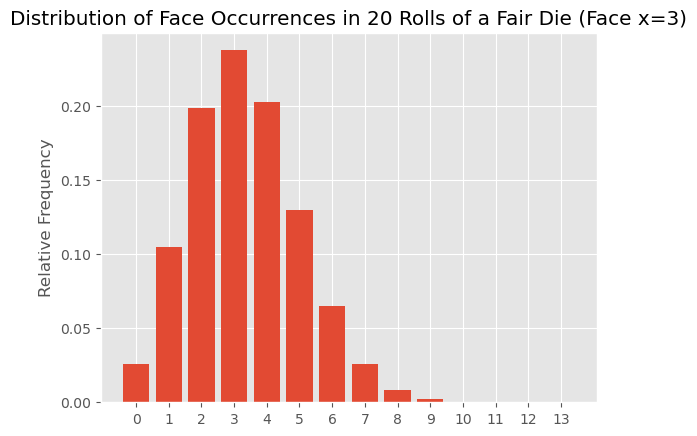

In [179]:
num_Sims = 1000000
totalnumbers = 20*num_Sims

dice = npr.randint(1,7,size=(num_Sims,20))
event = (np.sum(dice==3,axis=1))


how_many_3,counts = np.unique(event,return_counts=True)
tot_counts = np.sum(counts)


relative_frequency = (counts/tot_counts)

plt.bar(how_many_3,relative_frequency)
plt.ylabel('Relative Frequency')
plt.title('Distribution of Face Occurrences in 20 Rolls of a Fair Die (Face x=3)')
plt.xticks(how_many_3)

([<matplotlib.axis.XTick at 0x1bf72af25d0>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17')])

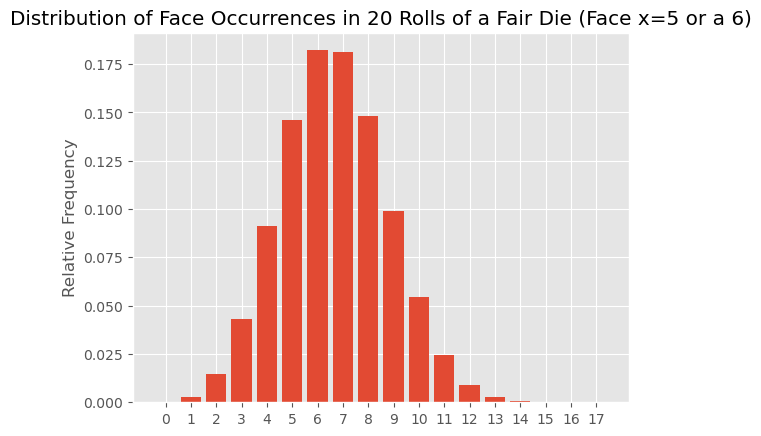

In [197]:
#2.
num_Sims = 1000000

dice = npr.randint(1,7,size=(num_Sims,20))
event = np.sum((dice == 5) | (dice == 6), axis=1)


how_many_5OR6,counts = np.unique(event,return_counts=True)
tot_counts = np.sum(counts)


relative_frequency = (counts/tot_counts)

plt.bar(how_many_5OR6,relative_frequency)
plt.ylabel('Relative Frequency')
plt.title('Distribution of Face Occurrences in 20 Rolls of a Fair Die (Face x=5 or a 6)')
plt.xticks(how_many_5OR6)


([<matplotlib.axis.XTick at 0x1bf72b9d8e0>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20')])

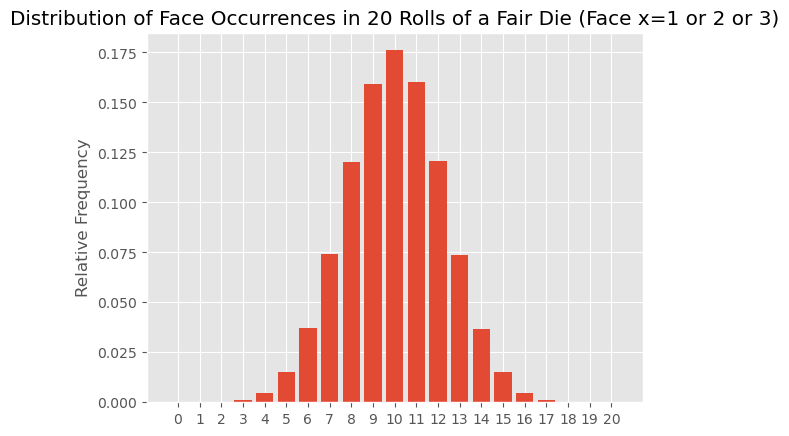

In [199]:
#3.
num_Sims = 1000000

dice = npr.randint(1,7,size=(num_Sims,20))
event = np.sum((dice == 1) | (dice == 2) | (dice==3), axis=1)


how_many_num,counts = np.unique(event,return_counts=True)
tot_counts = np.sum(counts)


relative_frequency = (counts/tot_counts)

plt.bar(how_many_num,relative_frequency)
plt.ylabel('Relative Frequency')
plt.title('Distribution of Face Occurrences in 20 Rolls of a Fair Die (Face x=1 or 2 or 3)')
plt.xticks(how_many_num)


Yes each of these does do as expected, this is because it resembles a binomal distribution shifted by how many certain numbers you are allowed to count. These will center around the probailty of 20*(probailty of rolling the face value on any given role)

## Problem 9

Suppose that you have a bag with 3 coins. One of them is a fair coin, but the others are biased trick coins. When flipped, the three coins come up heads with probability $\frac{1}{2}$, $\frac{2}{3}$, and $\frac{1}{5}$, respectively.

Consider the experiment where you pick one coin at random and flip it three times. Let $H_i$ be the event that the coin comes up heads on flip $i$. What is the probability of the outcome $H_1\cap H_2\cap \overline{H_3}$?

In [232]:
#9.



coins = ['F','NF1','NF2']
num_Sims = 100000
event = 0
for i in range(num_Sims):
    choice = npr.randint(0,3)

    coin_choice = coins[choice]

    if choin_choice == 'F':
        S = ['H','NH']

    if coin_choice == 'NF1':
        S = ['H','NH','H']

    if coin_choice == 'NF2':
        S = ['H','NH','NH','NH','NH']

    value = random.choices(S,k=3)
    if value ==['H','H','NH']:
        event = event+1
    

event/num_Sims


0.10333

## Problem 10

In what follows, apply a significance value $\alpha = 0.01$. That is, there must be less than a 1% probability of seeing such an extreme value under the null hypothesis before we are willing to conclude that the null hypothesis is not reasonable.

* If a 6-sided die is rolled 10 times and all the values are <=4, should we feel confident that the die is not fair (i.e., reject the null hypothesis with $p=0.01$)?

* Conduct the above simulation using a python function.


In [31]:
num_Sims = 100000
event = 0
count = 0

for i in range(num_Sims):
    dice = npr.randint(1,7,size=(1,10))
    count = np.sum(dice<=4,axis=1)
    if count == 10:
        event = event+1

print(event/num_Sims)


# Our alpha value ia 0.01712 which is larger then the signficance value thus we can not reject the null hypothesis.

0.01707


## Problem 11

Consider the experiment where you pick 3 cards at random from a deck of 52 playing cards (13 cards per suit) **without replacement**, i.e., at each card selection you will not put it back in the deck, and so the number of possible outcomes will change for each new draw.

Let $D_i$ denote the event the card is diamonds in the $i$th draw.

Build a simulation to compute the following probabilities:

1. $P(D_1)$

2. $P(D_1 \cap D_2)$

3. $P(D_1 \cap D_2 \cap \overline{D_3})$

4. $P(D_3 \cup D_2|D_1 )$

5. $P(D_3|D_1\cap D_2)$

*Note: to sample from a set **without replacement**, consider use the function ```numpy.random.choice``` by controling the parameter ```replace```*.

In [82]:
#Problem 11
#1.
num_Sims = 100000
event = 0

Deck = ['H','C','D','S']
for i in range(num_Sims):
    choice = npr.randint(0,4,)
    if Deck[choice] == 'D':
        event = event+1
print('The Probabilty of drawing a card on the first draw is:', event/num_Sims)    
#Easy Simulation to repersent just flipping the first card over


The Probabilty of drawing a card on the first draw is: 0.25061


In [56]:
#2.
num_Sims = 100000
suits = ['H', 'D', 'S', 'C']
deck = []
event = 0
for i in range(13):
    for suit in suits:
        deck.append(suit) 
random.shuffle(deck)    

for i in range(num_Sims):
    choice = np.random.choice(deck,3,replace=False)
    if choice[0] == 'D' and choice[1] == 'D':
        event = event +1
print('The esitmated probailty of drawing a dimoand on the first and second draw is:', event/num_Sims)

0.05834


In [60]:
#3.

num_Sims = 100000
suits = ['H', 'D', 'S', 'C']
deck = []
event = 0
for i in range(13):
    for suit in suits:
        deck.append(suit) 
random.shuffle(deck)    

for i in range(num_Sims):
    choice = np.random.choice(deck,3,replace=False)
    if choice[0] == 'D' and choice[1] == 'D' and choice[2] != 'D':
        event = event +1
        
print('The esitmated probailty of drawing a Dimoand on the first and second draw and not drawing a dimond on the thrid draw is:',event/num_Sims)

0.046


In [68]:
#4
num_Sims = 1000000
suits = ['H', 'D', 'S', 'C']
deck = []
event = 0
for i in range(13):
    for suit in suits:
        deck.append(suit) 
random.shuffle(deck)    

for i in range(num_Sims):
    choice = np.random.choice(deck,3,replace=False)
    if choice[0] == 'D':
        if choice[1] == 'D' or choice[2] == 'D':
            event = event+1
        
        
print('The esitmated probailty of drawing a Dimoand on the second or thrid draw given you drew a dimaond on the first draw is:' event/num_Sims)

0.104687


In [78]:
#4
num_Sims = 1000000
suits = ['H', 'D', 'S', 'C']
deck = []
event = 0
for i in range(13):
    for suit in suits:
        deck.append(suit) 
random.shuffle(deck)    

for i in range(num_Sims):
    choice = np.random.choice(deck,3,replace=False)
    if choice[0] == 'D' and choice[1] == 'D':
        if choice[2] == 'D':
            event = event+1
        
        
print('The esitmated probailty of drawing a Dimoand on the thrid draw given you drew a dimaond on the first or second draw is:', event/num_Sims)

The esitmated probailty of drawing a Dimoand on the thrid draw given you drew a dimaond on the first or second draw is: 0.012933


## Problem 12

Suppose that you have 6 coins: 2 fair coins and 4 unfair coins. When flipped, the coins flip heads with probability 0.5, 0.5, 0.8, 0.2, 0.1 and 0.3, respectively. Consider the experiment where you choose a coin at random and flip it for three times. Let $E$ be the event that 3 heads were observed. Compute $P(\text{fair coin}|E)$.

*Note: to encode specific probabilily of flipping heads, you may consider using the function ```numpy.random.choice``` by controlling the parameter ```p```.*

In [131]:

Coin = ['F','F','NF1','NF2','NF3','NF4']
faces = [1,0]
event = 0
num_Sims = 10000

for i in range(num_Sims):
    coin_Choice = np.random.choice(Coin,1,replace=False)
    if coin_Choice == 'F':
        prob_Head = 0.5
    if coin_Choice == 'NF1':
        prob_Head = 0.8
    if coin_Choice == 'NF2':
        prob_Head = 0.2
    if coin_Choice == 'NF3':
        prob_Head = 0.1
    if coin_Choice == 'NF3':
        prob_Head = 0.3
    head_Tail =np.random.choice(faces,3,replace=True,p = [prob_Head,1-prob_Head])

    if all(head_Tail):
        if coin_Choice == 'F':
            event = event+1
        
print('The probailty you had a fair coin if you got three heads in a row is:', event/num_Sims)








The probailty you had a fair coin if you got three heads in a row is: 0.0417


# Submission Instructions:

When you are done with the exercises in this notebook, upload a PDF or your results to Canvas.  To create the PDF with your code and results, you can use the following procedure:

1. Go to Kernel
2. Click Restart and Run All
3. Check over the notebook to make sure everything still looks right

**At this point, you may be able to just choose "Print" from JupyterLab's File menu and then print to PDF (OS dependent). If everything is correct in the PDF version, then upload that PDF to the assignment in Canvas.**

**If your PDF is missing any of your outputs, you can use the following procedure:**

4. Next, click File at the top on the tool bar below Jupyter icon
5. Click Save and Export Notebook as... and choose HTML
6. The HTML file will either open in a new tab/window or be downloaded to your Downloads folder. Open it if it is in the Downloads folder
7. Print the HTML file to PDF (how to do this is OS dependent). Make sure to save it to somewhere you can find it
8. Open the PDF to make sure that everything looks right and that nothing is cut off
9. Upload both the PDF and ipynb files to the Canvas assignment